# HOMEWORK 2 - TRANSFER FUNCTIONS AND SYSTEM IDENTIFICATION

## Cirstyn Michel

This homework is about transfer functions and system identification.
There are two problems.

Make a copy of this notebook, and answer the questions.

# Preliminaries

In [1]:
import control
import controlSBML as ctl
import numpy as np
import matplotlib.pyplot as plt
import sympy
import pandas as pd
import tellurium as te
import sympy as simp

# Helpers

In [2]:
class PlotResult(object):

    def __init__(self, times=None, yt=None, ax=None):
        self.times = times
        self.yt = yt
        self.ax = ax
        
    def __repr__(self):
        return ""

In [3]:
def plotTF(tf, times=None, is_plot=True, figsize=(5,5)):
    if times is None:
        times = np.linspace(0, 10, 100)
    _, yt = control.forced_response(tf, T=times, U=1)
    if is_plot:
        _, ax = plt.subplots(1, figsize=figsize)
        ax.plot(times, yt)
        ax.set_xlabel("time")
    else:
        ax = None
    return PlotResult(times=times, yt=yt, ax=ax)

# Tests
tf = control.TransferFunction([1], [1, 0])
plot_result = plotTF(tf, is_plot=False)
assert(isinstance(plot_result, PlotResult))
print("OK!")

OK!


In [4]:
def plotStaircaseResponse(builder, is_plot=True, **kwargs):
    """
    This function circumvents a bug in SISOTransferFunctionBuilder.plotStairCaseResponse.
    It has the same arguments and return value as the original function.
    """
    plot_result = builder.plotStaircaseResponse(is_plot=False, **kwargs)
    # Plot if requested
    if is_plot:
        times = np.array(plot_result.time_series.index)/1000
        df = pd.DataFrame(plot_result.time_series)
        df.index = times
        if "figsize" in kwargs.keys():
            figsize = kwargs["figsize"]
        else:
            figsize = (10, 10)
        legends = list(df.columns)
        fig, ax = plt.subplots(1, figsize=figsize)
        staircase_column = [c for c in df.columns if "staircase" in c][0]
        staircase_values = df[staircase_column].values
        del df[staircase_column]
        ax.plot(df)
        ax2 = ax.twinx()
        # Plot the staircase
        ax2.plot(times, staircase_values, color="red",
              linestyle="--")
        ax2.set_ylabel(staircase_column, color="red")
        ax.legend(df.columns)
    #
    return plot_result

# TESTS
if False:
    plot_response = plotStaircaseResponse(linear_builder, initial_value=2, final_value=10, num_step=5, figsize=(3,3),
                                        legend_crd=(0.5, 1), end_time=100, is_plot=True)
    assert(isinstance(plot_response.time_series, ctl.Timeseries))
    print("OK!")

# Problem 1: Constructing Laplace Transforms for reaction networks

In this problem, you will construct a Laplace transform
for the same branching network we discussed in class, but with
a different input and output.
Below is the reaction network:

\begin{eqnarray}
s_1 & \xrightarrow{k_1 s_1} s_2 \\
s_2 & \xrightarrow{k_2 s_2} s_1 \\
s_1 & \xrightarrow{k_3 s_1} s_3 \\
u & \xrightarrow{k_1 u} s_2 \\
\end{eqnarray}

The input to the system is $u$; the output is $s_2$. (In class, the output
was $s_3$.)

## 1. (5 pts) System equations (**3pts**)

Write the system equations for this reaction network.

* $\dot{s}_1 = -k_1 s_1 - k_3 s_1 + k_2 s_2$
* $\dot{s}_2 = k_1 s_1 - k_1 s_1 + k_1 u$
* $\dot{s}_3 = k_3 s_1$

**Comments**
1. The second equation should be: $\dot{s}_2 = k_1 s_1 - k_2 s_2 + k_1 u$. An easy way to check your equations is that a term is negative only if the species is the same as the species on left hand side.


## 2. (5 pts) LT of system equations (**5 pts**)

Write the Laplace transforms of the system equations.

* $s S_1(s) = -k_1 S_1(s) - k_3 S_1(s) + k_2 S_2(s)$
* $s S_2(s) = k_1 S_1(s) - k_2 S_2(s) + k_1 U(s)$
* $s S_3(s) = k_3 S_1(s)$

## 3. (25 pts) Calculate transfer function (**20 pts**)

Calculate the transfer function $G(s) = \frac{S_2(s)}{U(s)}$

$s S_2(s) = k_1 S_1(s) - k_2 S_2(s) + k_1 U(s)  
$

$s S_1(s) + k_1 S_1(s) + k_3 S_1(s) = k_2 S_2(s)  
$

$S_1(s + k_1 + k_3) = k_2 S_2(s)  
$

$S_1 = \frac{k_2 S_2(s)}{s + k_1 + k_3}  
$

$s S_2(s) = k_1 \frac{k_2 S_2(s)}{s + k_1 + k_3}  - k_2 S_2(s) + k_1 U(s)  
$

$s S_2(s) - k_1 \frac{k_2 S_2(s)}{s + k_1 + k_3}  + k_2 S_2(s) = k_1 U(s)  
$

$S_2(s - \frac{k_1k_2}{s + k_1 + k_3}  + k_2) = k_1 U(s)  
$

$S_2(\frac{s^2 + k_1s + k_3s -k_2 + k_2 s + k_2k_1 + k_2k_3}{s + k_1 + k_3}) = k_1 U(s)  
$

$S_2(\frac{s^2 + (k_1 + k_3 + k_2)s + k_2k_3+k_2k_1-k_2}{s + k_1 + k_3}) = k_1 U(s)  
$

$\frac{S_2(s)}{U(s)} = \frac{k_1 (s + k_1 + k_3)}{s^2 + (k_1 + k_3 + k_2)s + k_2k_3+k_2k_1-k_2}
$





**Comments**
1. You should get the follow. It seems that you have a small mistake in the denominator. Did you use sympy? I illustrated the issue in section 4 by changing k2 to 2.
$\frac{S_2(s)}{U(s)} = 
\frac{ k_{1} \left(k_{1} + k_{3} + s\right)}{k_{1} s + k_{2} k_{3} + k_{2} s + k_{3} s + s^{2}}$

## 4. (5 pts) Predict step response (**5 pts**)

Use the ``control`` package to construct the transfer function that you derived in Step 3, and simulate the transfer function. Plot the result.

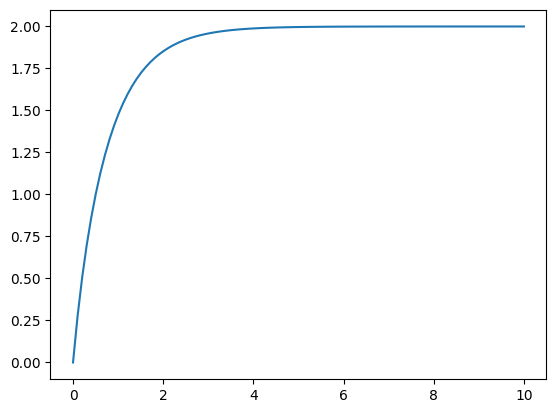

In [15]:

k1, k2, k3 = (3, 1, 1)
k1, k2, k3 = (3, 2, 1) # See what happens when k2 = 2
times = np.linspace(0, 10, 100)
# Response to input
tf = control.TransferFunction([k1,k1*(k1+k3)],
                              [1, k1+k2+k3, (k2*k3)+(k2*k1)-k2])
_, yt = control.forced_response(tf, T=times, U=1)
# Plot the results
plt.plot(times, yt)

## 5. (5 pts) Simulate in Antimony (**5 pts**)

Write an Antimony model for the original system and simulate it for a step respoinse.

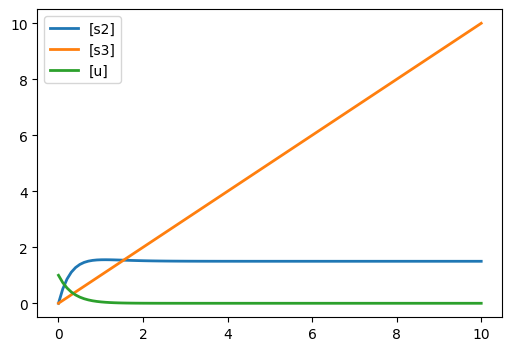

In [14]:
model = """
$s1 -> s2; k1*s1
s2 -> s1; k2*s2
s1 -> s3; k3*s1
u-> s2; k1*u

u = 1  // Step response
s2 = 0
s1 = 1
k1 = 3
s3 = 0
k2 = 1
k2 = 2 // See what happens when k2 = 2
k3 = 1
"""

rr = te.loada(model)
rr.simulate(0, 10, 100)
rr.plot()

Note that when k2=2, the figures are not identical.

## 6. (5 pts) Analysis (**5 pts**)

1. How does the transfer function you derived and simulated in step 3 compare with the simulation results for the Antimony model in step 4?
The two functions are very similar. They have very smilar shapes. They a very similar steady state value at a similar rate although although the transfer function seems a bit slower. 
2. How does DC gain change as $k_1$ increases?
DC gain increase proportionally to k1 as it increases when all other system parameters stay the same. 
3. Explain why the DC gain of this system is finite whereas the DC gain of the system with $s_3$ as output does not have finite DC gain.
S2 is both produced and consumed. This allows it to eventually reach an equilibrium value which is representative of the finite DC gain. S3 however is only produced and never consumed. There is no way for it to leave the system so its concentration grows infinitely. DC gain is the ratio of output to input so if the output is infinite so is DC gain. 


# Problem 2: System Identification

You will do system identification for the system you chose in the first homework.

## 1. (20 pts) Determine the operating region for you system. (**20 pts**)

Use ``SISOTransferFunctionBuilder`` to plot a staircase of the control input to your system and the measured output.
Explain why you chose the operating region you did (i.e., the value ranges of
the control input).

In [7]:
bsubtilus_CTLSB = ctl.ControlSBML("https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000001053.2?filename=Garde2020.xml", 
                        input_names=["Ai"], output_names=["Gp"])
linear_builder = bsubtilus_CTLSB.makeSISOTransferFunctionBuilder()


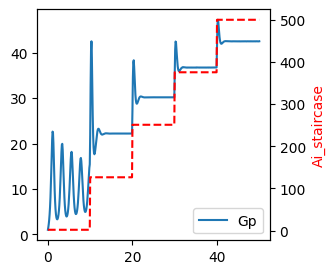

In [8]:
plotStaircaseResponse(linear_builder, initial_value=2, final_value=500, num_step=5, figsize=(3,3),
                                    legend_crd=(0.5, 1), end_time=50)

I chose the input values between 0 and 800 because it was this magnitude of step in the input that allowed the best control of the output. You can see with each step of increase input the output responds accordingly. 

## 2. (20 pts) Find a tranfser function for your system for the operating region. (**20 pts**)

Use ``SISOTransferFunctionBuilder`` to fit a transfer function for your system.
Justify that the transfer function fits sufficiently well and does not overfit.

In [9]:
def testTransferFunction(num_degree, denom_degree, final_value, end_time):
    fitter_result = linear_builder.fitTransferFunction(num_degree + 1, denom_degree + 1, 
                                                       final_value=final_value,
                                                       initial_value=0, end_time=end_time)
    ctl.plotOneTS(fitter_result.time_series[["Gp","predicted"]], figsize=(3,3), legend_crd=(2,1))
    print(fitter_result.transfer_function)
    print(fitter_result.nfev)
    print(fitter_result.redchi)
    return fitter_result

**Comment**
1. Good idea to make a function!

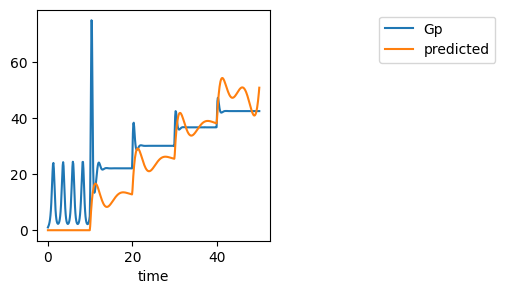


    0.03283 s^4 - 0.01835 s^3 + 0.02864 s^2 + 0.004189 s + 0.01028
----------------------------------------------------------------------
0.1314 s^5 + 0.08492 s^4 + 0.1238 s^3 + 0.1087 s^2 + 0.1076 s + 0.1011

374
98.07591113902355


In [10]:
tf45 = testTransferFunction(4,5,500,50)

The above transfer function fits reasonably well as seen in the similar shape of the orange graphed predicted line from the transfer function and the blue graphed line representing the original model. I selected the chosen parameters because they had a relatively high reduced chi squared score (~88) but did not require thousands of iterations to reach optimizations as other well fitting models did.

*note I removed the step function of the input line in the plot above because it was such a larger magnitude than the output. This made it almost impossible to see the change in output at that scale. 

## 3. (10 pts)  Analyze the transfer function. (**9 pts**)

What is the DC gain? What are the poles? What are the implications for control?

In [11]:
print("DC Gain:" ,fitter_result.transfer_function.dcgain())
print("Poles:", fitter_result.transfer_function.poles())

NameError: name 'fitter_result' is not defined

The DC gain is about 0.1 indicating that for every 10 units of input put into the system, you will get about 1 unit output. This is a relatively low DC gain and in order to use the selected input for control of output you will need a lot of input which might not make for the most ideal control system. The poles of the systems are all imaginiary which indicates oscillations . Based on the original model, this makes sense. Additionlly, the dominant pole is positive, although only slightly which means the system is unstable and will not converge, which also is in agreeance with the above plot. 

**Comments**
1. Did you run the notebook before submitting it? I think you made a script into a function and so fitter_result is not defined.